# The Statistics of big-men in the modern NBA

It's a well-known narrative that the dynasty of the Golden State Warriors changed the game of basketball. The teams are more inclined to shoot from behind the arc, and there are players around the league who take more three-pointers than an entire team would take 20 years ago. Here, we look for the reflection of the modern playing style on the statistics of players. More specifically, we look into the effect of this style on the statistics of post-players or big men.

We start by loading the dataset that contains the players' statistics for years 1991-2021.

In [1]:
import pandas as pd

DF = pd.read_csv('players.csv',encoding="latin-1", delimiter=";")



First, we select the statistics we want to analyze, then define the positions we consider as big men. After cleaning the dataset from the repeated rows that were the names of the column, we split the data frame into statistics for each year.

In [2]:
Features = ['3PA','2PA','FTA','TRB','AST','STL','BLK','TOV','PF','PTS']

Bigs = ['C','C-PF','PF','PF-C']



for feature in Features:
    to_drop = DF[DF[feature] == feature].index
    # Drop the found rows from the DataFrame
    DF = DF.drop(to_drop)

    
DF = DF.reset_index(drop=True)
DF['Big_man'] = 0
DF.loc[DF['Pos'].isin(Bigs), 'Big_man'] = 1

df = [y for x, y in DF.groupby('Year')]

df[-1].head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Big_man
16681,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2,3.7,...,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5,2021,1
16682,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.4,0.4,0.3,0,0,0,0.1,0.3,2021,0
16683,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,2021,1
16684,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,6.7,9,5.4,1.2,1,2.6,2.3,18.7,2021,1
16685,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,3.8,4.5,1.9,0.4,1.1,1,1.8,13.5,2021,1
16686,5,LaMarcus Aldridge,C,35,SAS,21,18,25.9,5.5,11.8,...,3.7,4.5,1.7,0.4,0.9,1,1.7,13.7,2021,1
16687,5,LaMarcus Aldridge,C,35,BRK,5,5,26,5,9.6,...,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8,2021,1
16688,6,Ty-Shon Alexander,SG,22,PHO,15,0,3.1,0.2,0.8,...,0.5,0.7,0.4,0,0.1,0.2,0.1,0.6,2021,0
16689,7,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10,...,2.8,3.1,2.2,1,0.5,1.5,1.9,11,2021,0
16690,8,Grayson Allen,SG,25,MEM,50,38,25.2,3.5,8.3,...,2.8,3.2,2.2,0.9,0.2,1,1.4,10.6,2021,0


Then, we train a set of decision trees, one for the stats of each year, to predict whether or not a player is a big man. It might be intuitive to assume that since the league is moving toward position-less basketball, it should be harder to predict a player's position from their statistics. This assumption should result in a drop in the model's accuracy in recent years. Also, we extracted the importance of each feature from the trained models, which is the normalized reduction of Gini impurity (the function used to measure the quality of the split) brought by that feature.

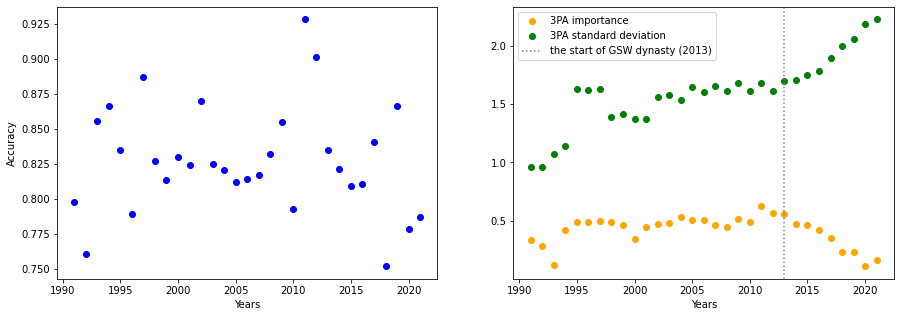

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for year,year_stat in enumerate(df):
    X = year_stat[Features].astype(float)

    y = year_stat['Big_man']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create the decision tree model
    clf = DecisionTreeClassifier()

    # Train the model on the training data
    clf.fit(X_train, y_train)

    # Test the model on the test data
    accuracy = clf.score(X_test, y_test)
    
    ax1.scatter(1991+year,accuracy,c='blue')
    
    # Get the feature importances
    importances = clf.feature_importances_

    # Get the importance of the '3PA' feature
    tpa_importance = importances[X.columns.get_loc('3PA')]


    # Plot the importance of the '3PA' feature
    ax2.scatter(1991+year,tpa_importance,c='orange',label='3PA importance' if year == 0 else None)
    ax2.scatter(1991+year,X['3PA'].std(),c='green', label='3PA standard deviation' if year == 0 else None)
    
ax2.axvline(x=2013, linestyle=':', color='gray', label= 'the start of GSW dynasty (2013)')
ax2.set_xlabel("Years")
ax1.set_xlabel("Years")
ax1.set_ylabel("Accuracy")

ax2.legend()

The left figure shows the accuracy of the model trained here throughout the years. This figure shows no significant drop in accuracy in recent years. We conclude that despite the rise of versatile post players around the league that can shoot the ball and take the load of playmaking, there are still indicators in players' statistics to predict their position. On the other side, the figure on the right shows that since 2013, the tendency for outside shooting is becoming less important to determine a player's position, meaning that more big men are attempting three-pointers. This is true while the green plot shows that the distance of three-point specialists from average players is also increasing. 
In conclusion, as we all know, the total number of three-pointers is increasing. But also, the distribution of '3PA' is becoming more spread out, and despite that fact, the power forwards and centers are shooting more and more like guards and small forwards.